In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
del titanic_df['Cabin'] # 너무 많은 결측치가 존재
del titanic_df['Name'] # Name은 큰 의미를 갖고있지 않은 일련번호
del titanic_df['Ticket'] # ticket 번호에서 패턴이 확인되지 않음

del test_df['Cabin'] # 너무 많은 결측치가 존재
del test_df['Name'] # Name은 큰 의미를 갖고있지 않은 일련번호
del test_df['Ticket'] # ticket 번호에서 패턴이 확인되지 않음

In [4]:
sex_mapping = {'male': 0, 'female': 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

emb_mapping = {'S': 0, 'C': 1, 'Q': 2}
titanic_df['Embarked'] = titanic_df['Embarked'].map(emb_mapping)
test_df['Embarked'] = test_df['Embarked'].map(emb_mapping)

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [6]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

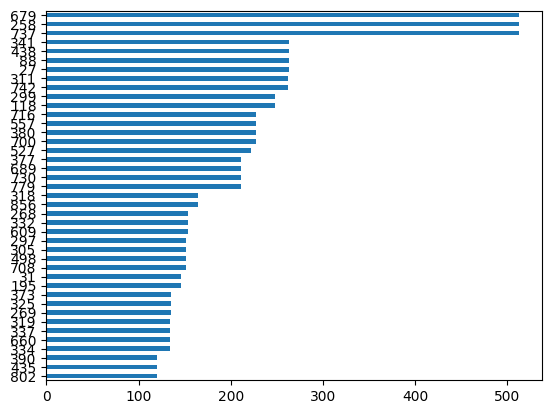

In [7]:
sorted_df = titanic_df.sort_values(by='Fare')
sorted_df['Fare'][850:].plot(kind='barh')
plt.show()

In [8]:
titanic_df.loc[titanic_df['Fare'] <= 31, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 31) & (titanic_df['Fare'] <=100), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 100) & (titanic_df['Fare'] <=200), 'Fare'] = 2
titanic_df.loc[(titanic_df['Fare'] > 200) & (titanic_df['Fare'] <=300), 'Fare'] = 3
titanic_df.loc[titanic_df['Fare'] > 300, 'Fare'] = 4

test_df.loc[test_df['Fare'] <= 31, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare'] <=100), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 100) & (test_df['Fare'] <=200), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 200) & (test_df['Fare'] <=300), 'Fare'] = 3
test_df.loc[test_df['Fare'] > 300, 'Fare'] = 4

titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,0.0,0.0
1,2,1,1,1,38.0,1,0,1.0,1.0
2,3,1,3,1,26.0,0,0,0.0,0.0
3,4,1,1,1,35.0,1,0,1.0,0.0
4,5,0,3,0,35.0,0,0,0.0,0.0


In [9]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,0.0,2
1,893,3,1,47.0,1,0,0.0,0
2,894,2,0,62.0,0,0,0.0,2
3,895,3,0,27.0,0,0,0.0,0
4,896,3,1,22.0,1,1,0.0,0


In [10]:
titanic_df['Family_num'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
del titanic_df['SibSp']
del titanic_df['Parch']

test_df['Family_num'] = test_df['SibSp'] + test_df['Parch'] + 1
del test_df['SibSp']
del test_df['Parch']

In [11]:
titanic_df['isAlone'] = 0
titanic_df.loc[titanic_df['Family_num'] == 1, 'isAlone'] = 1

test_df['isAlone'] = 0
test_df.loc[test_df['Family_num'] == 1, 'isAlone'] = 1

In [12]:
titanic_df['Family_num'].value_counts()

Family_num
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [13]:
family_mapping = {1:0, 2:0.3, 3:0.6, 4:0.9, 5:1.2, 6:1.5, 7:1.8, 8:2.1, 9:2.4, 10:2.7, 11:3}
titanic_df['Family_num'] = titanic_df['Family_num'].map(family_mapping)
test_df['Family_num'] = test_df['Family_num'].map(family_mapping)

In [14]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
most_frequent_value1 = titanic_df['Age'].mode()[0]
most_frequent_value2 = titanic_df['Fare'].mode()[0]
print(most_frequent_value1, most_frequent_value2)

24.0 0.0


In [16]:
titanic_df['Age'] = titanic_df['Age'].fillna(24)

test_df['Age'] = test_df['Age'].fillna(24)

In [17]:
titanic_df.dropna(inplace=True)
test_df['Fare'] = test_df['Fare'].fillna(0)

In [18]:
missing_values_count = test_df.isnull().sum()
missing_values_count

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_num     0
isAlone        0
dtype: int64

In [19]:
missing_values_count = titanic_df.isnull().sum()
missing_values_count

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_num     0
isAlone        0
dtype: int64

In [20]:
X_df = titanic_df.copy(deep=True)
Y_df = titanic_df['Survived']
del X_df['Survived']

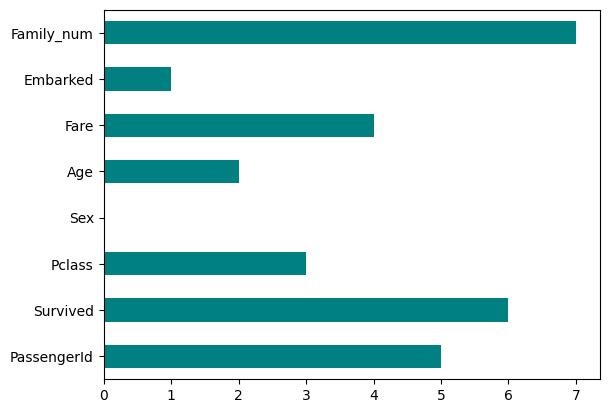

In [21]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

X = X_df.to_numpy()
Y = Y_df.to_numpy()

# Calculating scores
ranks = fisher_score.fisher_score(X, Y)

# Plotting the ranks
feat_importances = pd.Series(ranks, titanic_df.columns[0:len(titanic_df.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [22]:
from sklearn import model_selection

train_data, test_data, train_label, test_label = model_selection.train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

In [23]:
# from sklearn.datasets import fetch_openml
# from sklearn.impute import SimpleImputer

# from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

cv_results ={}

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    
    cv_scores = cross_val_score(pipeline, train_data, train_label, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores
    
for name, scores in cv_results.items():
    print(f'{name}: {scores.mean():.2f} ')

LogisticRegression: 0.79 
DecisionTree: 0.74 
RandomForest: 0.81 
SVM: 0.82 
KNN: 0.81 
GradientBoosting: 0.82 


In [24]:
model = SVC()
pipeline = make_pipeline(StandardScaler(), model)
pipeline.fit(train_data, train_label)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [25]:
predict = pipeline.predict(test_df)

In [26]:
pass_id = test_df['PassengerId'].to_numpy()

In [27]:
print(len(pass_id), len(predict))

418 418


In [28]:
df = pd.DataFrame({'PassengerId':pass_id, 'Survived': predict})
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [29]:
df.to_csv('Titanic_tutorial_kaggle.csv', index=False)